In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [2]:
import matplotlib.pyplot as plt
import torch
import os
import random


In [3]:
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [4]:
df.head(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp


In [5]:
df.shape

(10015, 7)

In [6]:
img_part_1 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1"
img_part_2 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2"

def get_img_path(image_id):
    file = f"{image_id}.jpg"
    path1 = os.path.join(img_part_1,file)
    path2 = os.path.join(img_part_2,file)

    if os.path.exists(path1):
        return path1
    elif os.path.exists(path2):
        return path2
    else:
        return None

df['img_path']=df['image_id'].apply(get_img_path)


In [7]:
df.img_path.isna().sum()

0

In [8]:
df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,img_path
3814,HAM_0003412,ISIC_0026241,nv,follow_up,50.0,female,back,/kaggle/input/skin-cancer-mnist-ham10000/HAM10...
4943,HAM_0005150,ISIC_0028161,nv,follow_up,45.0,female,lower extremity,/kaggle/input/skin-cancer-mnist-ham10000/HAM10...
6891,HAM_0007464,ISIC_0028371,nv,histo,50.0,male,back,/kaggle/input/skin-cancer-mnist-ham10000/HAM10...
7728,HAM_0004444,ISIC_0032769,nv,histo,55.0,male,upper extremity,/kaggle/input/skin-cancer-mnist-ham10000/HAM10...
9288,HAM_0003045,ISIC_0031475,nv,consensus,45.0,male,back,/kaggle/input/skin-cancer-mnist-ham10000/HAM10...


In [9]:
df.drop(columns=['lesion_id','image_id'],inplace=True)

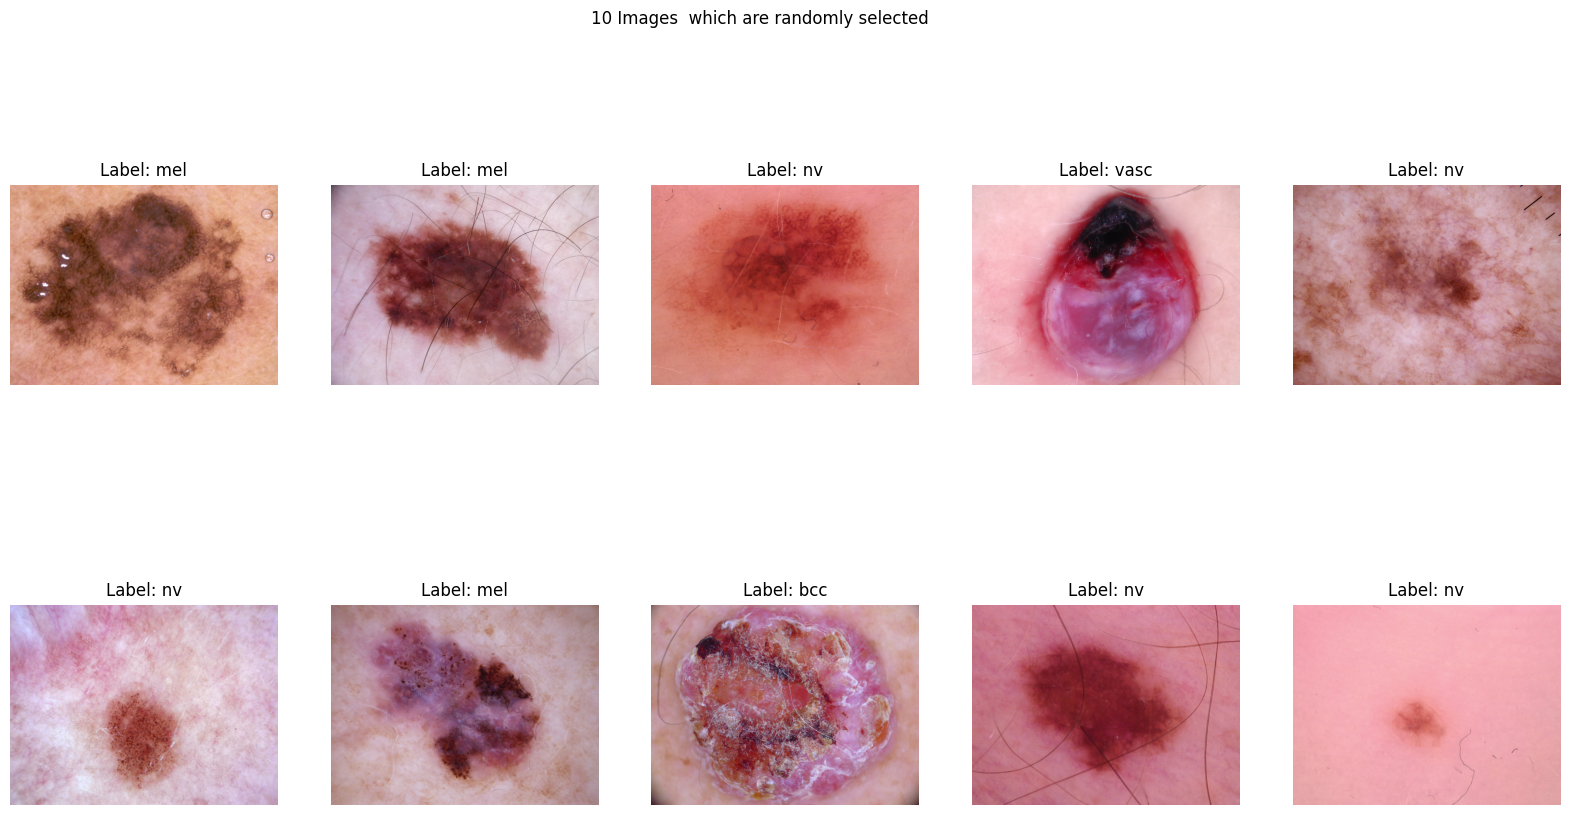

In [10]:
from PIL import Image
fig,axes = plt.subplots(2,5,figsize=(20, 10))
fig.suptitle("10 Images  which are randomly selected")
for i,ax  in enumerate(axes.flat):
    number = random.randint(1,10015)
    img = Image.open(df.img_path[number])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.dx[number]}")

plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dx            10015 non-null  object 
 1   dx_type       10015 non-null  object 
 2   age           9958 non-null   float64
 3   sex           10015 non-null  object 
 4   localization  10015 non-null  object 
 5   img_path      10015 non-null  object 
dtypes: float64(1), object(5)
memory usage: 469.6+ KB


In [12]:
df.age.isna().sum()

57

In [13]:
df.dropna(subset=['age'],inplace =True)

In [14]:
df.iloc[:,0]

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 9958, dtype: object

In [15]:
df.dx.value_counts()

dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [16]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [18]:
 from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [19]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [20]:
categorical_cols = ['sex', 'dx_type', 'localization'] 
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_cols])
X_test_encoded = ohe.transform(X_test[categorical_cols])

X_train_encoded_df = pd.DataFrame(X_train_encoded,columns=ohe.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded,columns=ohe.get_feature_names_out(categorical_cols))


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
X_train_encoded_df.head(5)

,sex_female,sex_male,sex_unknown,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,localization_abdomen,localization_acral,localization_back,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
X_train_encoded_df['age'] = X_train['age'].reset_index(drop=True)
X_test_encoded_df['age']  = X_test['age'].reset_index(drop=True)

In [23]:
X_train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sex_female                    7966 non-null   float64
 1   sex_male                      7966 non-null   float64
 2   sex_unknown                   7966 non-null   float64
 3   dx_type_confocal              7966 non-null   float64
 4   dx_type_consensus             7966 non-null   float64
 5   dx_type_follow_up             7966 non-null   float64
 6   dx_type_histo                 7966 non-null   float64
 7   localization_abdomen          7966 non-null   float64
 8   localization_acral            7966 non-null   float64
 9   localization_back             7966 non-null   float64
 10  localization_chest            7966 non-null   float64
 11  localization_ear              7966 non-null   float64
 12  localization_face             7966 non-null   float64
 13  loc

In [24]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

scaled_train_data= scaler.fit_transform(X_train_encoded_df)
scaled_test_data = scaler.transform(X_test_encoded_df)

In [25]:
X_train_encoded_df = pd.DataFrame(scaled_train_data,columns=X_train_encoded_df.columns)
X_test_encoded_df = pd.DataFrame(scaled_test_data,columns=X_test_encoded_df.columns)

In [26]:
X_train_encoded_df

,sex_female,sex_male,sex_unknown,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,localization_abdomen,localization_acral,localization_back,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,age
0,-0.912430,0.914279,-0.031706,-0.081059,-0.308681,-0.770815,0.934597,-0.334587,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,8.824471,-0.407201,-0.137589,-0.351277,1.065907
1,1.095975,-1.093758,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,1.952765,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,0.475166
2,1.095975,-1.093758,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,1.952765,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,-0.410946
3,1.095975,-1.093758,-0.031706,-0.081059,-0.308681,-0.770815,0.934597,2.988757,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,-1.001687
4,-0.912430,0.914279,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,2.455787,-0.137589,-0.351277,-1.001687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,-0.912430,0.914279,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,1.881231,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,-1.001687
7962,-0.912430,0.914279,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,2.455787,-0.137589,-0.351277,1.361278
7963,1.095975,-1.093758,-0.031706,-0.081059,-0.308681,1.297327,-1.069980,-0.334587,-0.027455,1.881231,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,-1.887799
7964,-0.912430,0.914279,-0.031706,-0.081059,-0.308681,-0.770815,0.934597,2.988757,-0.027455,-0.531567,...,-0.184049,-0.07367,-0.09617,-0.512094,-0.133263,-0.113321,-0.407201,-0.137589,-0.351277,0.179796


In [27]:
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2  # This import is required

image_size = 224  
train_transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.4),
    A.ElasticTransform(p=0.2),
    A.GaussNoise(p=0.2),
    A.CLAHE(p=0.3),
    A.CoarseDropout(max_holes=2, max_height=32, max_width=32, min_holes=1, min_height=16, min_width=16, p=0.2),  # Arguments fixed
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Use ImageNet stats for pretrained models
    ToTensorV2(),
])



test_transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [71]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self,image_paths,metadata,labels,transform):
        self.image_paths = image_paths.reset_index(drop = True)
        self.metadata = metadata.reset_index(drop = True)
        self.labels = labels.reset_index(drop=True)
        self.transform = transform
        

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self,idx):
        img =Image.open(self.image_paths[idx])
        if isinstance(self.transform, A.Compose):
            img = np.array(img)
            img = self.transform(image=img)['image']
        else:
            img = self.transform(img)
        meta = torch.tensor(self.metadata.iloc[idx].values,dtype=torch.float32)
        labels = torch.tensor(self.labels.iloc[idx],dtype =torch.long)
        return img,meta,labels
        

In [72]:
from torch.utils.data import Dataset,DataLoader

In [73]:
X_train_img_paths=X_train['img_path']
X_test_img_paths =X_test['img_path']

In [74]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [75]:
train_dataset = CustomDataset(X_train_img_paths,X_train_encoded_df,y_train,train_transform)
test_dataset = CustomDataset(X_test_img_paths,X_test_encoded_df,y_test,test_transform)

In [76]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)

In [34]:
import torch.nn as nn

In [35]:
from torchvision import models


model = models.efficientnet_b0(weights='IMAGENET1K_V1')
# model.classifier[1] = nn.Linear(1280, 7) 

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 118MB/s] 


In [36]:
model.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

In [37]:
for param in model.features.parameters():
  param.requires_grad = False


In [38]:
model.classifier = nn.Sequential(
    nn.Linear(1280,1024),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(1024, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(0.3),
    nn.Linear(512, 7)  # Change 7 to your number of classes
)


In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [40]:
model = model.to(device)

In [41]:
learning_rate=0.0001
epochs = 10

In [42]:
import torch.optim as optim

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(),lr=learning_rate)

In [44]:
# for epoch in range(epochs):
#     model.train()
#     for images, labels in train_loader: # train_loader: DataLoader instance
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#     print(f"Epoch {epoch+1} complete.")

In [45]:
# #evaluation on testing data
# total = 0
# correct = 0

# with torch.no_grad():
#     for batch_featues,batch_labels in test_loader:
#         batch_featues,batch_labels = batch_featues.to(device),batch_labels.to(device)
#         outputs = model(batch_featues)
#         _,predicted = torch.max(outputs,1)

#         total += batch_labels.shape[0]
#         correct += (predicted == batch_labels).sum().item()

# print(correct/total)

In [46]:
# #evaluation on training data
# total = 0
# correct = 0

# with torch.no_grad():
#     for batch_featues,batch_labels in train_loader:
#         batch_featues,batch_labels = batch_featues.to(device),batch_labels.to(device)
#         outputs = model(batch_featues)
#         _,predicted = torch.max(outputs,1)

#         total += batch_labels.shape[0]
#         correct += (predicted == batch_labels).sum().item()

# print(correct/total)

In [77]:
class HybridCNN(nn.Module):

    def __init__(self,num_meta_features,num_classes):
        super().__init__()

        self.densenet = models.densenet121(pretrained=True)
        self.densenet.classifier = nn.Identity()

        self.meta_net = nn.Sequential(
            nn.Linear(num_meta_features,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            
            nn.Linear(128,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            
            nn.Linear(128,64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(1024 + 64,1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5),
            
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            
            nn.Linear(512,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            
            nn.Linear(128,128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            
            nn.Linear(128,num_classes)
            
        )

    def forward(self,img,meta):
        img_feat = self.densenet(img)
        meta_feat = self.meta_net(meta)
        combined = torch.cat([img_feat,meta_feat],dim = 1)
        return self.classifier(combined)

In [78]:
num_meta_features = X_train_encoded_df.shape[1]
num_classes = 7

model = HybridCNN(num_meta_features,num_classes).to(device)

In [79]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Consider class weights for imbalance
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.2)


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import copy


In [81]:
def train_sota_hybrid(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, early_stop_patience=7):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_f1 = 0
    epochs_no_improve = 0
    val_f1_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')

        # ----- Training -----
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []
        for images, meta_vecs, labels in train_loader:
            images = images.to(device)
            meta_vecs = meta_vecs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images, meta_vecs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_preds.extend(preds.cpu().numpy())
            train_labels.extend(labels.cpu().numpy())

        train_loss /= len(train_loader.dataset)
        train_acc = accuracy_score(train_labels, train_preds)
        train_f1 = f1_score(train_labels, train_preds, average='weighted')

        # ----- Validation -----
        model.eval()
        val_loss = 0.0
        val_preds, val_labels = [], []
        with torch.no_grad():
            for images, meta_vecs, labels in val_loader:
                images = images.to(device)
                meta_vecs = meta_vecs.to(device)
                labels = labels.to(device)

                outputs = model(images, meta_vecs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        val_acc = accuracy_score(val_labels, val_preds)
        val_f1 = f1_score(val_labels, val_preds, average='weighted')
        val_f1_history.append(val_f1)

        scheduler.step(val_loss)

        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Train F1: {train_f1:.4f}')
        print(f'Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f} | Val   F1: {val_f1:.4f}')

        # Early stopping and checkpointing
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model_wts = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
            print("Validation F1 improved, model weights saved.")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stop_patience:
                print(f"Early stopping after {epoch+1} epochs.")
                break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    print("Best Validation F1: {:.4f}".format(best_val_f1))
    return model, val_f1_history


In [82]:

best_model, val_f1_hist = train_sota_hybrid(
    model, train_loader, test_loader, criterion, optimizer, scheduler, device,
    num_epochs=30, early_stop_patience=7
)


Epoch 1/30
Train Loss: 2.0372 | Train Acc: 0.2153 | Train F1: 0.2904
Val   Loss: 1.5577 | Val   Acc: 0.5151 | Val   F1: 0.5831
Validation F1 improved, model weights saved.
Epoch 2/30
Train Loss: 1.6343 | Train Acc: 0.4708 | Train F1: 0.5408
Val   Loss: 1.4109 | Val   Acc: 0.6702 | Val   F1: 0.6724
Validation F1 improved, model weights saved.
Epoch 3/30
Train Loss: 1.3703 | Train Acc: 0.6156 | Train F1: 0.6368
Val   Loss: 1.0984 | Val   Acc: 0.7314 | Val   F1: 0.7141
Validation F1 improved, model weights saved.
Epoch 4/30
Train Loss: 1.1916 | Train Acc: 0.6585 | Train F1: 0.6553
Val   Loss: 0.9271 | Val   Acc: 0.7450 | Val   F1: 0.7167
Validation F1 improved, model weights saved.
Epoch 5/30
Train Loss: 1.0740 | Train Acc: 0.6927 | Train F1: 0.6753
Val   Loss: 0.8768 | Val   Acc: 0.7395 | Val   F1: 0.7143
Epoch 6/30
Train Loss: 0.9674 | Train Acc: 0.7089 | Train F1: 0.6893
Val   Loss: 0.7733 | Val   Acc: 0.7610 | Val   F1: 0.7293
Validation F1 improved, model weights saved.
Epoch 7/30
Tr

In [90]:
class_names = df.iloc[:,0].unique()

In [94]:
df.iloc[:,0].value_counts()

dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for images, meta_vecs, labels in test_loader:
        images = images.to(device)
        meta_vecs = meta_vecs.to(device)
        outputs = model(images, meta_vecs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
print(classification_report(y_true, y_pred, target_names=class_names))
print(confusion_matrix(y_true, y_pred))


              precision    recall  f1-score   support

         bkl       0.55      0.47      0.51        66
          nv       0.72      0.74      0.73       103
          df       0.80      0.65      0.72       218
         mel       0.70      0.30      0.42        23
        vasc       0.72      0.51      0.60       222
         bcc       0.89      0.97      0.93      1332
       akiec       0.72      0.93      0.81        28

    accuracy                           0.85      1992
   macro avg       0.73      0.65      0.67      1992
weighted avg       0.84      0.85      0.84      1992

[[  31   13    8    0    8    6    0]
 [   4   76    5    0    2   16    0]
 [  11    6  141    2   13   45    0]
 [   2    2    2    7    1    2    7]
 [   8    4    6    0  113   91    0]
 [   0    4   14    0   20 1291    3]
 [   0    0    0    1    0    1   26]]


<Figure size 700x700 with 0 Axes>

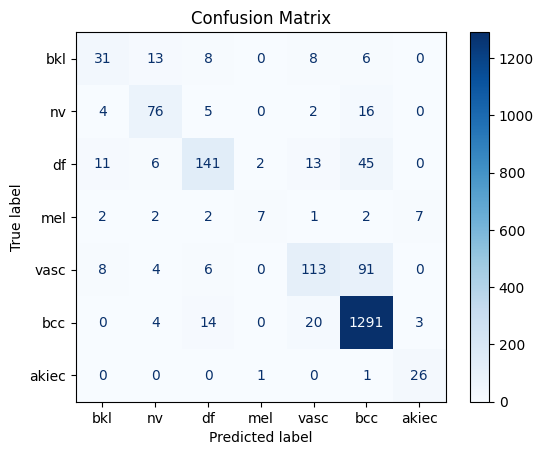

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(7, 7))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

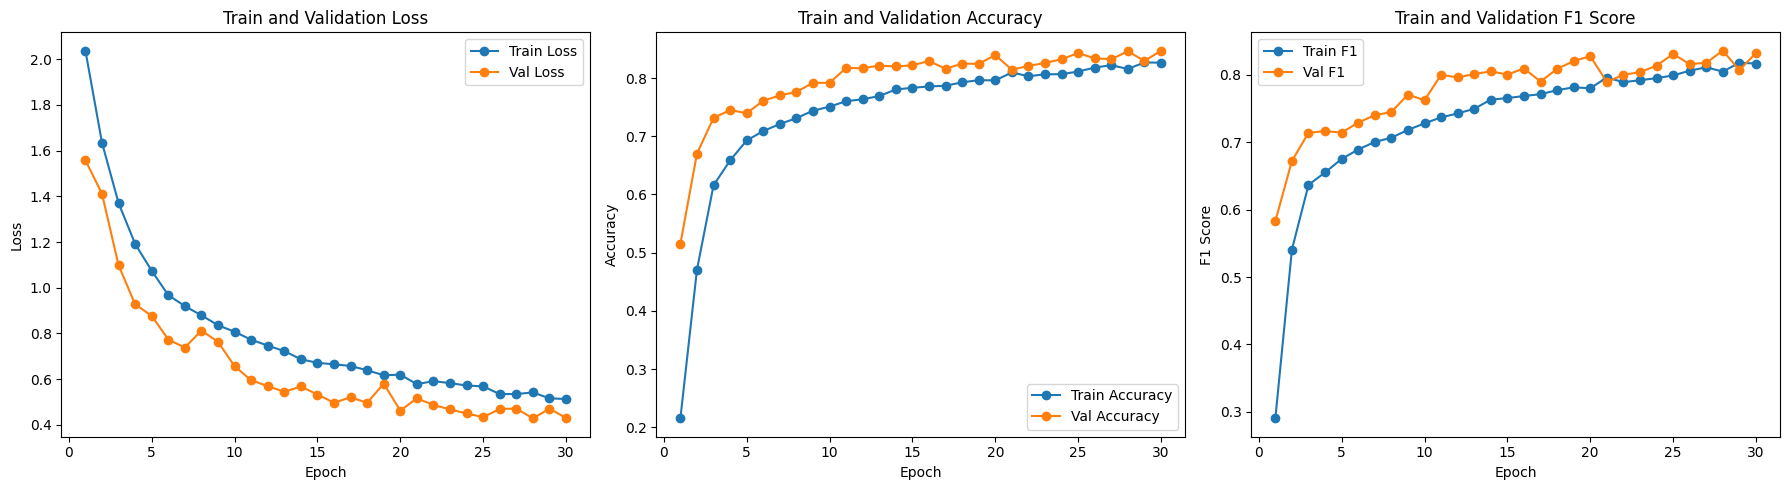

In [100]:
import matplotlib.pyplot as plt

# Provided metric values per epoch:
train_loss = [2.0372, 1.6343, 1.3703, 1.1916, 1.0740, 0.9674, 0.9195, 0.8790, 0.8359, 0.8073, 0.7724, 0.7467, 0.7226, 0.6870, 0.6713, 0.6647, 0.6575, 0.6387, 0.6170, 0.6194, 0.5778, 0.5913, 0.5822, 0.5722, 0.5680, 0.5345, 0.5348, 0.5416, 0.5159, 0.5129]
val_loss   = [1.5577, 1.4109, 1.0984, 0.9271, 0.8768, 0.7733, 0.7381, 0.8125, 0.7631, 0.6563, 0.5952, 0.5693, 0.5446, 0.5678, 0.5326, 0.4967, 0.5203, 0.4964, 0.5803, 0.4619, 0.5158, 0.4867, 0.4674, 0.4497, 0.4335, 0.4693, 0.4710, 0.4283, 0.4704, 0.4304]
train_acc  = [0.2153, 0.4708, 0.6156, 0.6585, 0.6927, 0.7089, 0.7209, 0.7311, 0.7438, 0.7508, 0.7602, 0.7635, 0.7690, 0.7803, 0.7832, 0.7855, 0.7867, 0.7926, 0.7963, 0.7959, 0.8096, 0.8030, 0.8064, 0.8066, 0.8111, 0.8180, 0.8221, 0.8155, 0.8268, 0.8263]
val_acc    = [0.5151, 0.6702, 0.7314, 0.7450, 0.7395, 0.7610, 0.7701, 0.7761, 0.7917, 0.7917, 0.8173, 0.8168, 0.8213, 0.8198, 0.8218, 0.8293, 0.8158, 0.8248, 0.8243, 0.8394, 0.8143, 0.8208, 0.8258, 0.8323, 0.8429, 0.8338, 0.8323, 0.8459, 0.8293, 0.8469]
train_f1   = [0.2904, 0.5408, 0.6368, 0.6553, 0.6753, 0.6893, 0.7005, 0.7068, 0.7184, 0.7281, 0.7370, 0.7428, 0.7497, 0.7633, 0.7656, 0.7687, 0.7714, 0.7773, 0.7816, 0.7802, 0.7961, 0.7892, 0.7921, 0.7952, 0.7992, 0.8063, 0.8113, 0.8049, 0.8180, 0.8169]
val_f1     = [0.5831, 0.6724, 0.7141, 0.7167, 0.7143, 0.7293, 0.7402, 0.7450, 0.7709, 0.7624, 0.8002, 0.7962, 0.8013, 0.8053, 0.8006, 0.8095, 0.7902, 0.8089, 0.8205, 0.8278, 0.7896, 0.8002, 0.8040, 0.8137, 0.8310, 0.8160, 0.8180, 0.8359, 0.8072, 0.8324]
epochs = range(1, 31)

plt.figure(figsize=(18, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Val Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Val Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

# F1 Score
plt.subplot(1, 3, 3)
plt.plot(epochs, train_f1, label='Train F1', marker='o')
plt.plot(epochs, val_f1, label='Val F1', marker='o')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Train and Validation F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


In [102]:
sample_img_path = X_test_img_paths.iloc[0]
sample_meta = torch.tensor(X_test_encoded_df.iloc[0].values, dtype=torch.float32)


In [105]:
from PIL import Image

# Open image as a PIL Image
img = Image.open(sample_img_path).convert("RGB")

# Apply torchvision transform directly to the PIL image
img_tensor = test_transform(img).unsqueeze(0).to(device)

# Metadata tensor preparation remains unchanged
meta_tensor = sample_meta.unsqueeze(0).to(device)


In [106]:
feature_maps, gradients = [], []

def forward_hook(module, input, output):
    feature_maps.append(output)

def backward_hook(module, grad_input, grad_output):
    gradients.append(grad_output[0])

# For DenseNet-121, last major conv block is features[-1] or features
# Confirm by printing model.densenet.features
target_layer = model.densenet.features[-1]
target_layer.register_forward_hook(forward_hook)
target_layer.register_backward_hook(backward_hook)


In [108]:
model.eval()

# --- Important: Do NOT use torch.no_grad() here ---
output = model(img_tensor, meta_tensor)
class_idx = output.argmax(dim=1).item()

# Backward for Grad-CAM
one_hot = torch.zeros((1, output.size(-1)), device=output.device)
one_hot[0][class_idx] = 1
model.zero_grad()  # Good practice to clear old gradients
output.backward(gradient=one_hot)


In [110]:
grads_val = gradients[0].cpu().data.numpy()[0]
fmap = feature_maps[0].cpu().data.numpy()[0]
weights = np.mean(grads_val, axis=(1, 2))  # Take mean across spatial dims

# Weighted sum of feature maps
cam = np.zeros(fmap.shape[1:], dtype=np.float32)
for i, w in enumerate(weights):
    cam += w * fmap[i]
cam = np.maximum(cam, 0)                   # ReLU, zero negative values
cam = cv2.resize(cam, (img_tensor.shape[2], img_tensor.shape[3]))
cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

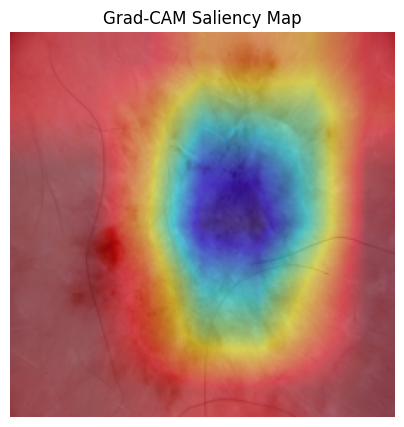

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



# Resize and normalize the original PIL image
original_img = np.array(img.resize((img_tensor.shape[2], img_tensor.shape[3]))) / 255.0

# Create the heatmap using OpenCV - note cam must be uint8 [0-255]
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET) / 255.0
# Blend heatmap with the original image
overlay = (original_img * 0.5 + heatmap * 0.5)

# Display Grad-CAM overlay
plt.figure(figsize=(5, 5))
plt.imshow(overlay)
plt.axis('off')
plt.title('Grad-CAM Saliency Map')
plt.show()
